In [1]:
# run this cell to setup matplotlib, and also import the very important take_picture function from camera!
%matplotlib notebook
import matplotlib.pyplot as plt
from camera import take_picture
import numpy as np

In [2]:
# run this cell to download the models from dlib
from dlib_models import download_model, download_predictor, load_dlib_models
download_model()
download_predictor()
from dlib_models import models

File already exists:
	c:\users\aleks_000\desktop\bwsi\cogworks_2018\dependencies\dlibmodels\dlib_models\dlib_face_recognition_resnet_model_v1.dat
File already exists:
	c:\users\aleks_000\desktop\bwsi\cogworks_2018\dependencies\dlibmodels\dlib_models\shape_predictor_68_face_landmarks.dat


Let's take a picture to test this out!

In [7]:
dataface = {}

<IPython.core.display.Javascript object>


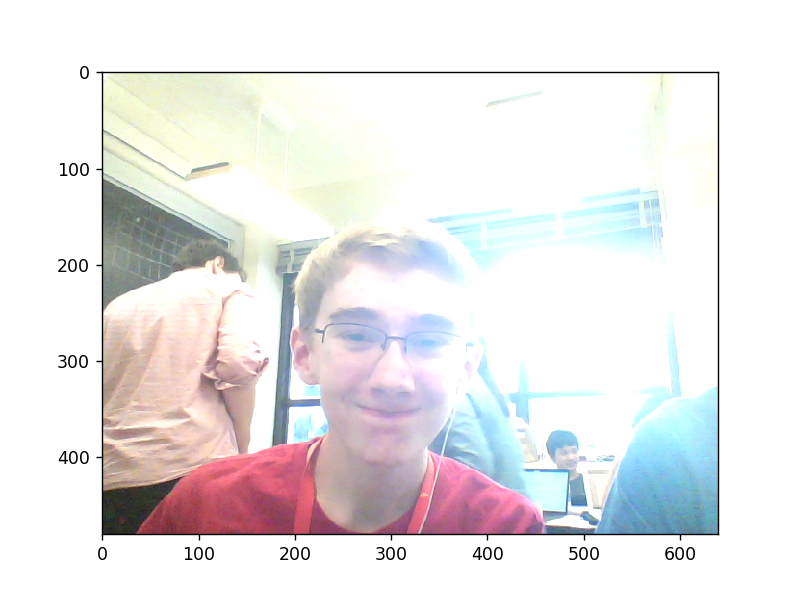

In [73]:
fig,ax = plt.subplots()
pic = take_picture()
ax.imshow(pic)

Hello gorgeous!! Now, let's see if we can detect any faces.

In [74]:
# first, we load the models that dlib has to detect faces.
load_dlib_models()
face_detect = models["face detect"]
face_rec_model = models["face rec"]
shape_predictor = models["shape predict"]

In [75]:
detections = list(face_detect(pic))
print(detections)

[rectangle(214,234,393,413)]


Heck yeah, we got a face, which is a step in the right direction. However, in order to match names with faces, we need to be able to distinguish *between* faces. Luckily, dlib has this cool feature called a "face descriptor vector". Think of a face descriptor as a numerical representation of the intricacies of your face. Run the code below to SEE the descriptor vector!

<IPython.core.display.Javascript object>


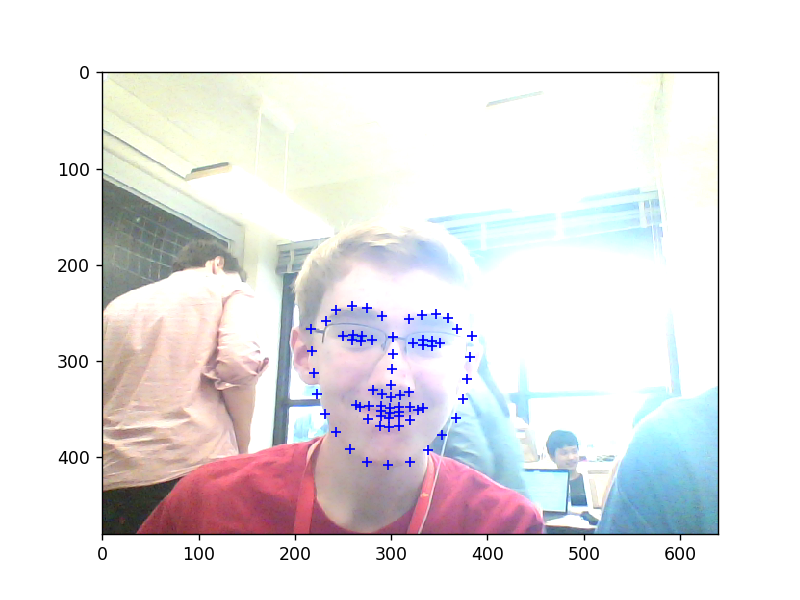

Number of faces detected: 1


In [76]:
from matplotlib.patches import Rectangle
fig,ax = plt.subplots()
ax.imshow(pic)


print("Number of faces detected: {}".format(len(detections)))
for k, d in enumerate(detections):
    # Get the landmarks/parts for the face in box d.
    shape = shape_predictor(pic, d)
    # Draw the face landmarks on the screen.
    for i in range(68):
        ax.plot(shape.part(i).x,shape.part(i).y,'+',color="blue")

In [33]:
# let's take a look as to what the descriptor is!!
shape = shape_predictor(pic, detections[0])
descriptor = np.array(face_rec_model.compute_face_descriptor(pic, shape))
print(descriptor)
print(descriptor.shape)

[ 1.93546135e-02  6.71539158e-02  7.20379949e-02 -6.01171851e-02
 -6.54581785e-02  3.41009721e-02 -4.20651212e-02 -4.09174114e-02
  1.09106898e-01 -1.24808773e-01  1.95117891e-01 -4.95731421e-02
 -2.55849600e-01  3.30697279e-04  1.06087439e-02  1.37256280e-01
 -1.47914767e-01 -7.57260844e-02 -1.35429323e-01 -7.05914572e-02
  3.52907777e-02  1.04721025e-01  1.29486667e-02  5.38219139e-02
 -1.77304536e-01 -3.48467201e-01 -9.31357145e-02 -4.01727669e-02
 -4.97477129e-03 -1.47460684e-01 -5.38508222e-02  9.95503366e-02
 -9.85505208e-02 -1.58111192e-03  1.57594606e-02  7.79969618e-03
 -1.27408430e-01 -9.42090750e-02  1.87853590e-01  1.37605816e-01
 -1.84027106e-01  3.63421626e-03  3.21895257e-03  2.82540143e-01
  2.01513886e-01  1.01909470e-02  1.78292450e-02 -9.35985595e-02
  5.75325601e-02 -3.09067488e-01  6.06742799e-02  1.94087386e-01
  2.11732201e-02  1.27263591e-01  7.65797943e-02 -1.10535972e-01
 -2.91437600e-02  9.19798911e-02 -1.38997570e-01  5.26530556e-02
  4.40012887e-02 -1.14986

In [77]:
from getting_name_database import match_descriptor_in_dataface

match_descriptor_in_dataface(dataface, np.array([descriptor]), threshold=1)

1


['Sam']

In [71]:
from dataface_add import dataface_add

dataface_add(dataface, "Sam", descriptor)